In [13]:
import os
import time
from __future__ import print_function
import numpy as np
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D,Dense, Flatten,Activation
from keras.layers import MaxPool2D
from keras.utils import np_utils,plot_model
import matplotlib.image as mpimg
from keras.datasets import cifar10
import matplotlib.pyplot as plt

In [14]:
batch_size = 100
num_class = 10
epoch =15

(xtrain,ytrain),(xtest,ytest) = cifar10.load_data()
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

# convert images to float type
xtrain = xtrain.astype('float32')
xtest = xtest.astype('float32')

# normalize
xtrain  = xtrain/255.
xtest = xtest/255.0

# one-hot-encode the target labels
ytrain = np_utils.to_categorical(ytrain,num_class)
ytest = np_utils.to_categorical(ytest,num_class)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [23]:
# model
model  = Sequential()
model.add(Conv2D(32,(3,3),input_shape = xtrain.shape[1:],activation='relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu'))

model.add(Dense(num_class))
model.add(Activation('softmax'))

optim = keras.optimizers.Adagrad(lr = 0.05)
model.compile(loss='categorical_crossentropy',optimizer=optim,metrics = ['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 512)              

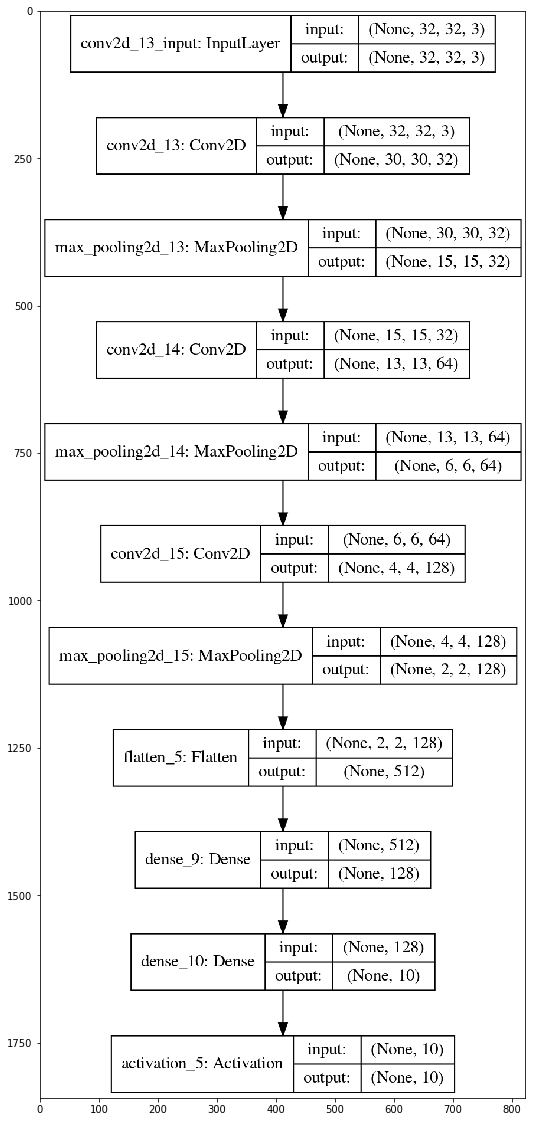

In [24]:
plot_model(model, to_file = 'modelcifar10.png', show_layer_names=True,show_shapes=True,dpi=150)

plt.figure(figsize=(30,20))
img = mpimg.imread('modelcifar10.png')
imgplot = plt.imshow(img)

In [25]:
# train model
start = time.time()
Model_history = model.fit(xtrain,ytrain,batch_size=batch_size,epochs=epoch,validation_data=(xtest,ytest),verbose=1)
end = time.time()
print('Time taken for training is: {}s'.format(end - start))
print('')
score = model.evaluate(xtest,ytest)
print('Test loss: {}'.format(score[0]))
print('Test accuracy: {}'.format(score[1]))

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 23s 469us/step - loss: 1.9488 - accuracy: 0.2904 - val_loss: 1.6176 - val_accuracy: 0.4114
Epoch 2/15
50000/50000 [==============================] - 34s 682us/step - loss: 1.4787 - accuracy: 0.4693 - val_loss: 1.3302 - val_accuracy: 0.5247
Epoch 3/15
50000/50000 [==============================] - 30s 597us/step - loss: 1.2724 - accuracy: 0.5489 - val_loss: 1.1769 - val_accuracy: 0.5803
Epoch 4/15
50000/50000 [==============================] - 22s 449us/step - loss: 1.1309 - accuracy: 0.6001 - val_loss: 1.1391 - val_accuracy: 0.5926
Epoch 5/15
50000/50000 [==============================] - 22s 442us/step - loss: 1.0236 - accuracy: 0.6408 - val_loss: 1.0331 - val_accuracy: 0.6401
Epoch 6/15
50000/50000 [==============================] - 23s 457us/step - loss: 0.9309 - accuracy: 0.6731 - val_loss: 0.9877 - val_accuracy: 0.6521
Epoch 7/15
50000/50000 [==============================] 

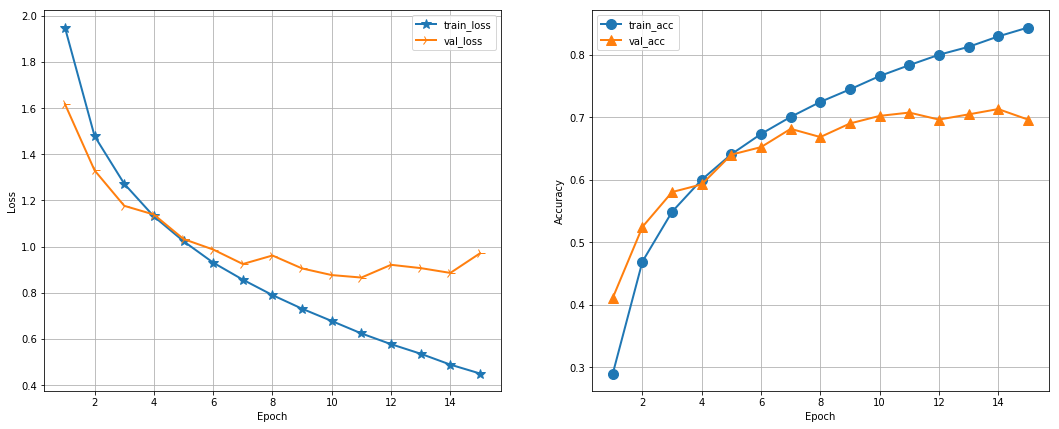

In [26]:
train_loss = Model_history.history['loss']
train_acc = Model_history.history['accuracy']
val_loss = Model_history.history['val_loss']
val_acc = Model_history.history['val_accuracy']

plt.figure(figsize=(18,7))
epok = range(1,len(val_loss)+1)
plt.subplot(121)
line1 = plt.plot(epok,train_loss,label='train_loss')
line2 = plt.plot(epok,val_loss,label='val_loss')
plt.setp(line1,linewidth = 2,marker = '*',markersize = 10)
plt.setp(line2,linewidth =2,marker='4',markersize = 10)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)

plt.subplot(122)
line3 = plt.plot(epok,train_acc,label='train_acc')
line4 = plt.plot(epok,val_acc,label='val_acc')
plt.setp(line3,linewidth=2,marker = 'o',markersize=10)
plt.setp(line4,linewidth =2,marker = '^',markersize = 10)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)

plt.show()
